In [1]:
library(data.table)
library(cowplot)
library(Matrix)
library(BuenColors)
library(RColorBrewer)
library(ggpubr)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: MASS
Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:cowplot’:

    get_legend



#### define functions

In [2]:
plot_umap <- function(df_umap,labels,title='UMAP',colormap=colormap){
    set.seed(2019) 
    df_umap = data.frame(cbind(df_umap,labels),stringsAsFactors = FALSE)
    colnames(df_umap) = c('umap1','umap2','celltype')
    df_umap$umap1 = as.numeric(df_umap$umap1)
    df_umap$umap2 = as.numeric(df_umap$umap2)
    options(repr.plot.width=4, repr.plot.height=4)
    p <- ggplot(shuf(df_umap), aes(x = umap1, y = umap2, color = celltype)) +
      geom_point(size = 1) + scale_color_manual(values = colormap) +
      ggtitle(title)
    return(p)
}

### Input

In [3]:
workdir = './output/'
path_fig = paste0(workdir,'figures/')
system(paste0('mkdir -p ',path_fig))

In [4]:
path_umap = paste0(workdir,'umap_rds/')
path_clusters = paste0(workdir,'clusters/')

In [5]:
se = readRDS(paste0(workdir,'se.rds'))

In [6]:
se

class: RangedSummarizedExperiment 
dim: 80000 1200 
metadata(0):
assays(1): counts
rownames(80000): chr1_30528_31028 chr1_97671_98171 ...
  chrX_154841997_154842497 chrX_154862080_154862580
rowData names(0):
colnames(1200): CD4_1 CD4_2 ... NK_1199 NK_1200
colData names(1): label

In [7]:
for (df in sapply(strsplit(list.files(path_umap), "\\."),'[',1)){
  assign(df,readRDS(paste0(path_umap,df,'.rds')))
}

In [8]:
ls()

[1] "df"                      "df_umap_BROCKMAN"       
 [3] "df_umap_chromVAR_kmer"   "df_umap_chromVAR_kmer2" 
 [5] "df_umap_chromVAR_motif"  "df_umap_chromVAR_motif2"
 [7] "df_umap_Cicero"          "df_umap_Cicero2"        
 [9] "df_umap_cisTopic"        "df_umap_control"        
[11] "df_umap_Cusanovich2018"  "df_umap_GeneScoring"    
[13] "df_umap_GeneScoring2"    "df_umap_scABC"          
[15] "df_umap_Scasat"          "df_umap_SCRAT"          
[17] "df_umap_SCRAT2"          "df_umap_SnapATAC"       
[19] "path_clusters"           "path_fig"               
[21] "path_umap"               "plot_umap"              
[23] "se"                      "workdir"

In [9]:
for (method in sapply(strsplit(list.files(path_clusters), "\\."),'[',1)){
  assign(method,read.table(paste0(path_clusters,method,'.tsv'),
                                             sep='\t',header = TRUE,row.names = 1,
                                             colClasses = c('character','character','character')))
}

In [10]:
ls()

[1] "BROCKMAN_clusters"            "chromVAR_kmers_clusters"     
 [3] "chromVAR_kmers_pca_clusters"  "chromVAR_motifs_clusters"    
 [5] "chromVAR_motifs_pca_clusters" "Cicero_clusters"             
 [7] "Cicero_pca_clusters"          "cisTopic_clusters"           
 [9] "Control_clusters"             "Cusanovich2018_clusters"     
[11] "df"                           "df_umap_BROCKMAN"            
[13] "df_umap_chromVAR_kmer"        "df_umap_chromVAR_kmer2"      
[15] "df_umap_chromVAR_motif"       "df_umap_chromVAR_motif2"     
[17] "df_umap_Cicero"               "df_umap_Cicero2"             
[19] "df_umap_cisTopic"             "df_umap_control"             
[21] "df_umap_Cusanovich2018"       "df_umap_GeneScoring"         
[23] "df_umap_GeneScoring2"         "df_umap_scABC"               
[25] "df_umap_Scasat"               "df_umap_SCRAT"               
[27] "df_umap_SCRAT2"               "df_umap_SnapATAC"            
[29] "GeneScoring_clusters"         "GeneScoring_pca_clusters"    
[31] "method"                       "path_clusters"               
[33] "path_fig"                     "path_umap"                   
[35] "plot_umap"                    "scABC_clusters"              
[37] "Scasat_clusters"              "SCRAT_clusters"              
[39] "SCRAT_pca_clusters"           "se"                          
[41] "SnapATAC_clusters"            "workdir"

In [11]:
num_colors = length(unique(se@colData$label))+1
colormap = colorRampPalette(brewer.pal(8, "Set2"))(num_colors)
names(colormap) = as.character(seq(0,num_colors-1))

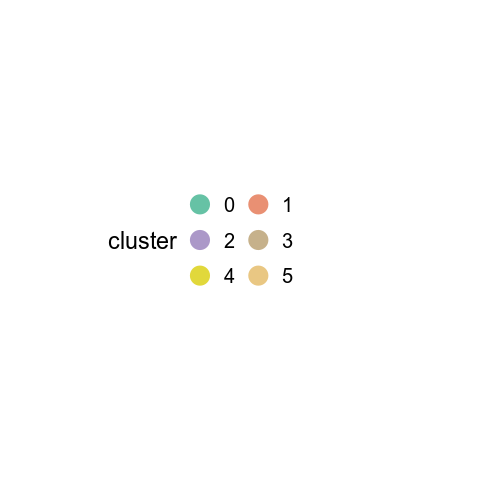

In [12]:
p_SnapATAC <- plot_umap(df_umap_SnapATAC,labels = SnapATAC_clusters['kmeans'],colormap = colormap,title='SnapATAC')

options(repr.plot.width=4, repr.plot.height=4)
leg <- cowplot::get_legend(p_SnapATAC + theme(legend.direction = "horizontal", legend.position = c(0.2,0.5)) + 
                           labs(color='cluster')+
                           guides(color=guide_legend(nrow=3,byrow=TRUE,override.aes = list(size=5))))
p_legend = as_ggplot(leg)
p_legend

In [13]:
fig_basename = "bonemarrow_cov2500_"
fig_width = 4*6
fig_height = 4*3

In [14]:
list_plots = c()
for(cl in c('louvain','kmeans','hc')){
    p_control <- plot_umap(df_umap_control,labels = Control_clusters[cl],colormap = colormap,title='Control-Naive')
    p_chromVAR_motif <- plot_umap(df_umap_chromVAR_motif,labels = chromVAR_motifs_clusters[cl],colormap = colormap,title='chromVAR motif')
    p_chromVAR_kmer <- plot_umap(df_umap_chromVAR_kmer,labels = chromVAR_kmers_clusters[cl],colormap = colormap,title='chromVAR kmer')
    p_chromVAR_motif2 <- plot_umap(df_umap_chromVAR_motif2,labels = chromVAR_motifs_pca_clusters[cl],colormap = colormap,title='chromVAR motif after PCA')
    p_chromVAR_kmer2 <- plot_umap(df_umap_chromVAR_kmer2,labels = chromVAR_kmers_pca_clusters[cl],colormap = colormap,title='chromVAR kmer after PCA')
    p_Cusanovich2018 <- plot_umap(df_umap_Cusanovich2018,labels = Cusanovich2018_clusters[cl],colormap = colormap,title='Cusanovich2018')
    p_cisTopic <- plot_umap(df_umap_cisTopic,labels = cisTopic_clusters[cl],colormap = colormap,title='cisTopic')
    p_GeneScoring <- plot_umap(df_umap_GeneScoring,labels = GeneScoring_clusters[cl],colormap = colormap,title='Gene Scoring')
    p_GeneScoring2 <- plot_umap(df_umap_GeneScoring2,labels = GeneScoring_pca_clusters[cl],colormap = colormap,title='Gene Scoring after PCA')
    p_Cicero <- plot_umap(df_umap_Cicero,labels = Cicero_clusters[cl],colormap = colormap,title='Cicero')
    p_Cicero2 <- plot_umap(df_umap_Cicero2,labels = Cicero_pca_clusters[cl],colormap = colormap,title='Cicero after PCA')
    p_SnapATAC <- plot_umap(df_umap_SnapATAC,labels = SnapATAC_clusters[cl],colormap = colormap,title='SnapATAC')
    p_scABC <- plot_umap(df_umap_scABC,labels = scABC_clusters[cl],colormap = colormap,title='scABC')
    p_SCRAT <- plot_umap(df_umap_SCRAT,labels = SCRAT_clusters[cl],colormap = colormap,title='SCRAT')
    p_SCRAT2 <- plot_umap(df_umap_SCRAT2,labels = SCRAT_pca_clusters[cl],colormap = colormap,title='SCRAT after PCA')
    p_Scasat <- plot_umap(df_umap_Scasat,labels = Scasat_clusters[cl],colormap = colormap,title='Scasat')
    p_BROCKMAN <- plot_umap(df_umap_BROCKMAN,labels = BROCKMAN_clusters[cl],colormap = colormap,title='BROCKMAN')
    
    options(repr.plot.width=fig_width, repr.plot.height=fig_height)
    p_figure <- cowplot::plot_grid(p_legend,
                   p_control+theme(legend.position = "none"),
                   p_cisTopic+theme(legend.position = "none"),
                   p_Cusanovich2018+theme(legend.position = "none"),
                   p_Scasat+theme(legend.position = "none"),  
                   p_SnapATAC+theme(legend.position = "none"), 
                   p_BROCKMAN+theme(legend.position = "none"),
                   p_chromVAR_kmer+theme(legend.position = "none"),
                   p_chromVAR_motif+theme(legend.position = "none"),
                   p_Cicero+theme(legend.position = "none"),
                   p_GeneScoring+theme(legend.position = "none"),
                   p_SCRAT+theme(legend.position = "none"),
                   p_scABC+theme(legend.position = "none"),
                   p_chromVAR_kmer2+theme(legend.position = "none"),
                   p_chromVAR_motif2+theme(legend.position = "none"),
                   p_Cicero2+theme(legend.position = "none"),
                   p_GeneScoring2+theme(legend.position = "none"),
                   p_SCRAT2+theme(legend.position = "none"),
                   labels = "",ncol = 6)
    list_plots[[as.character(cl)]] = p_figure
    cowplot::ggsave(p_figure,
                    filename = paste0(path_fig,fig_basename,cl,'.pdf'), 
                    width = fig_width, height = fig_height)
}

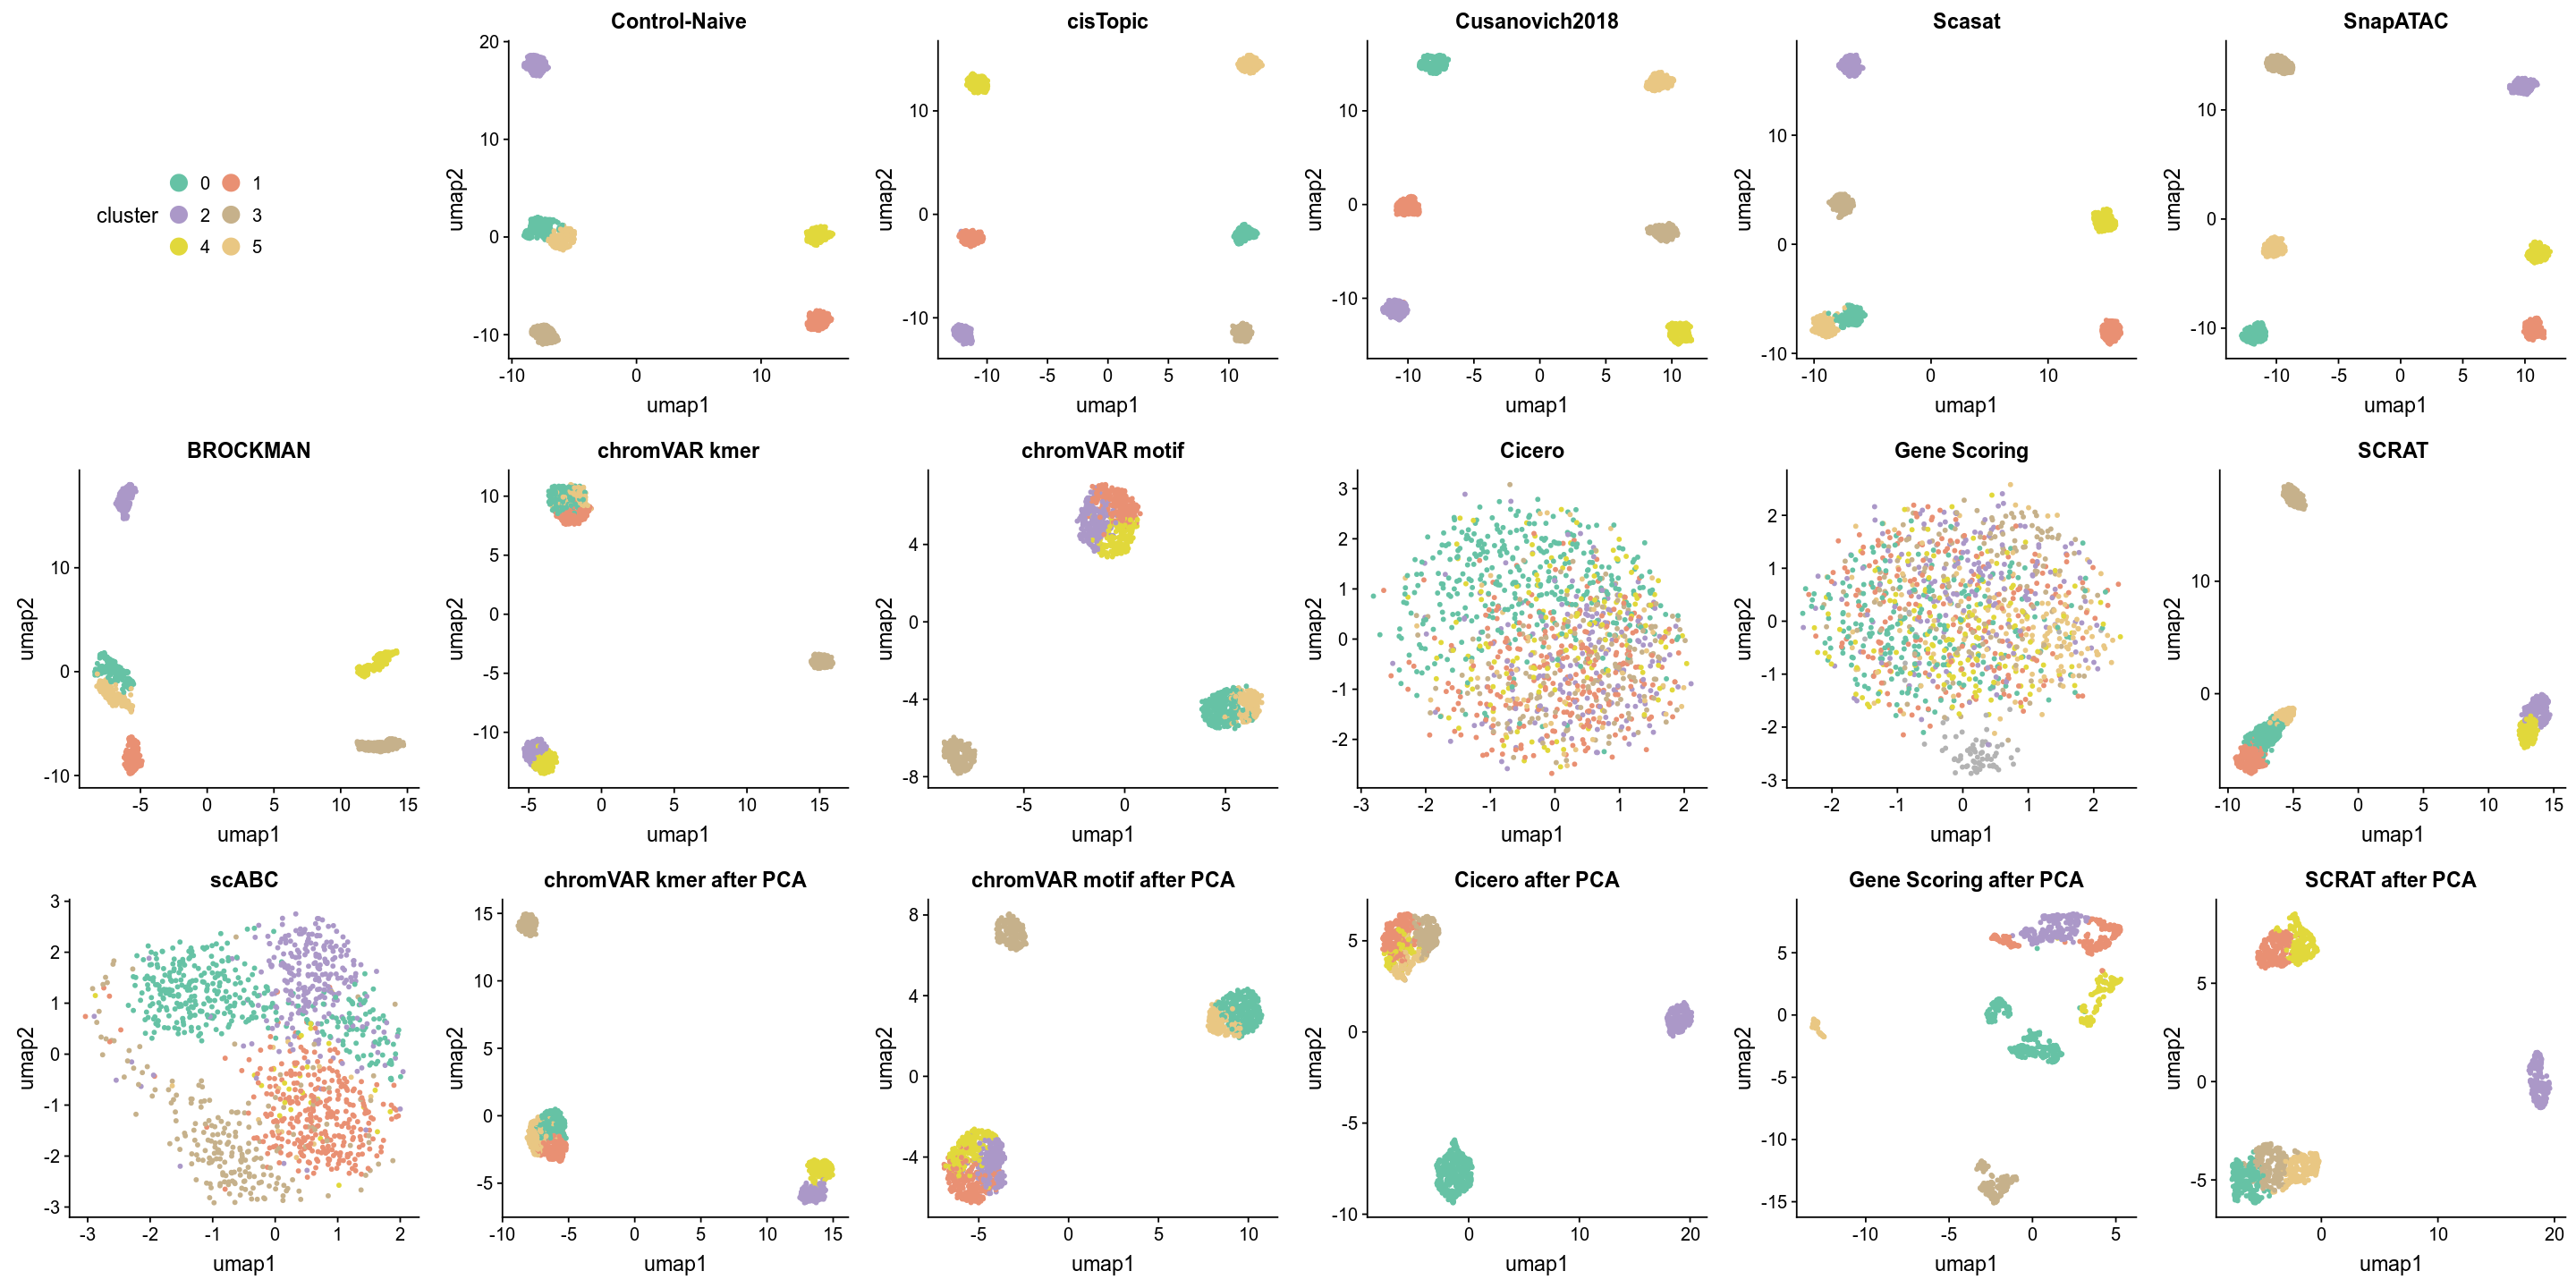

$louvain

$kmeans

$hc


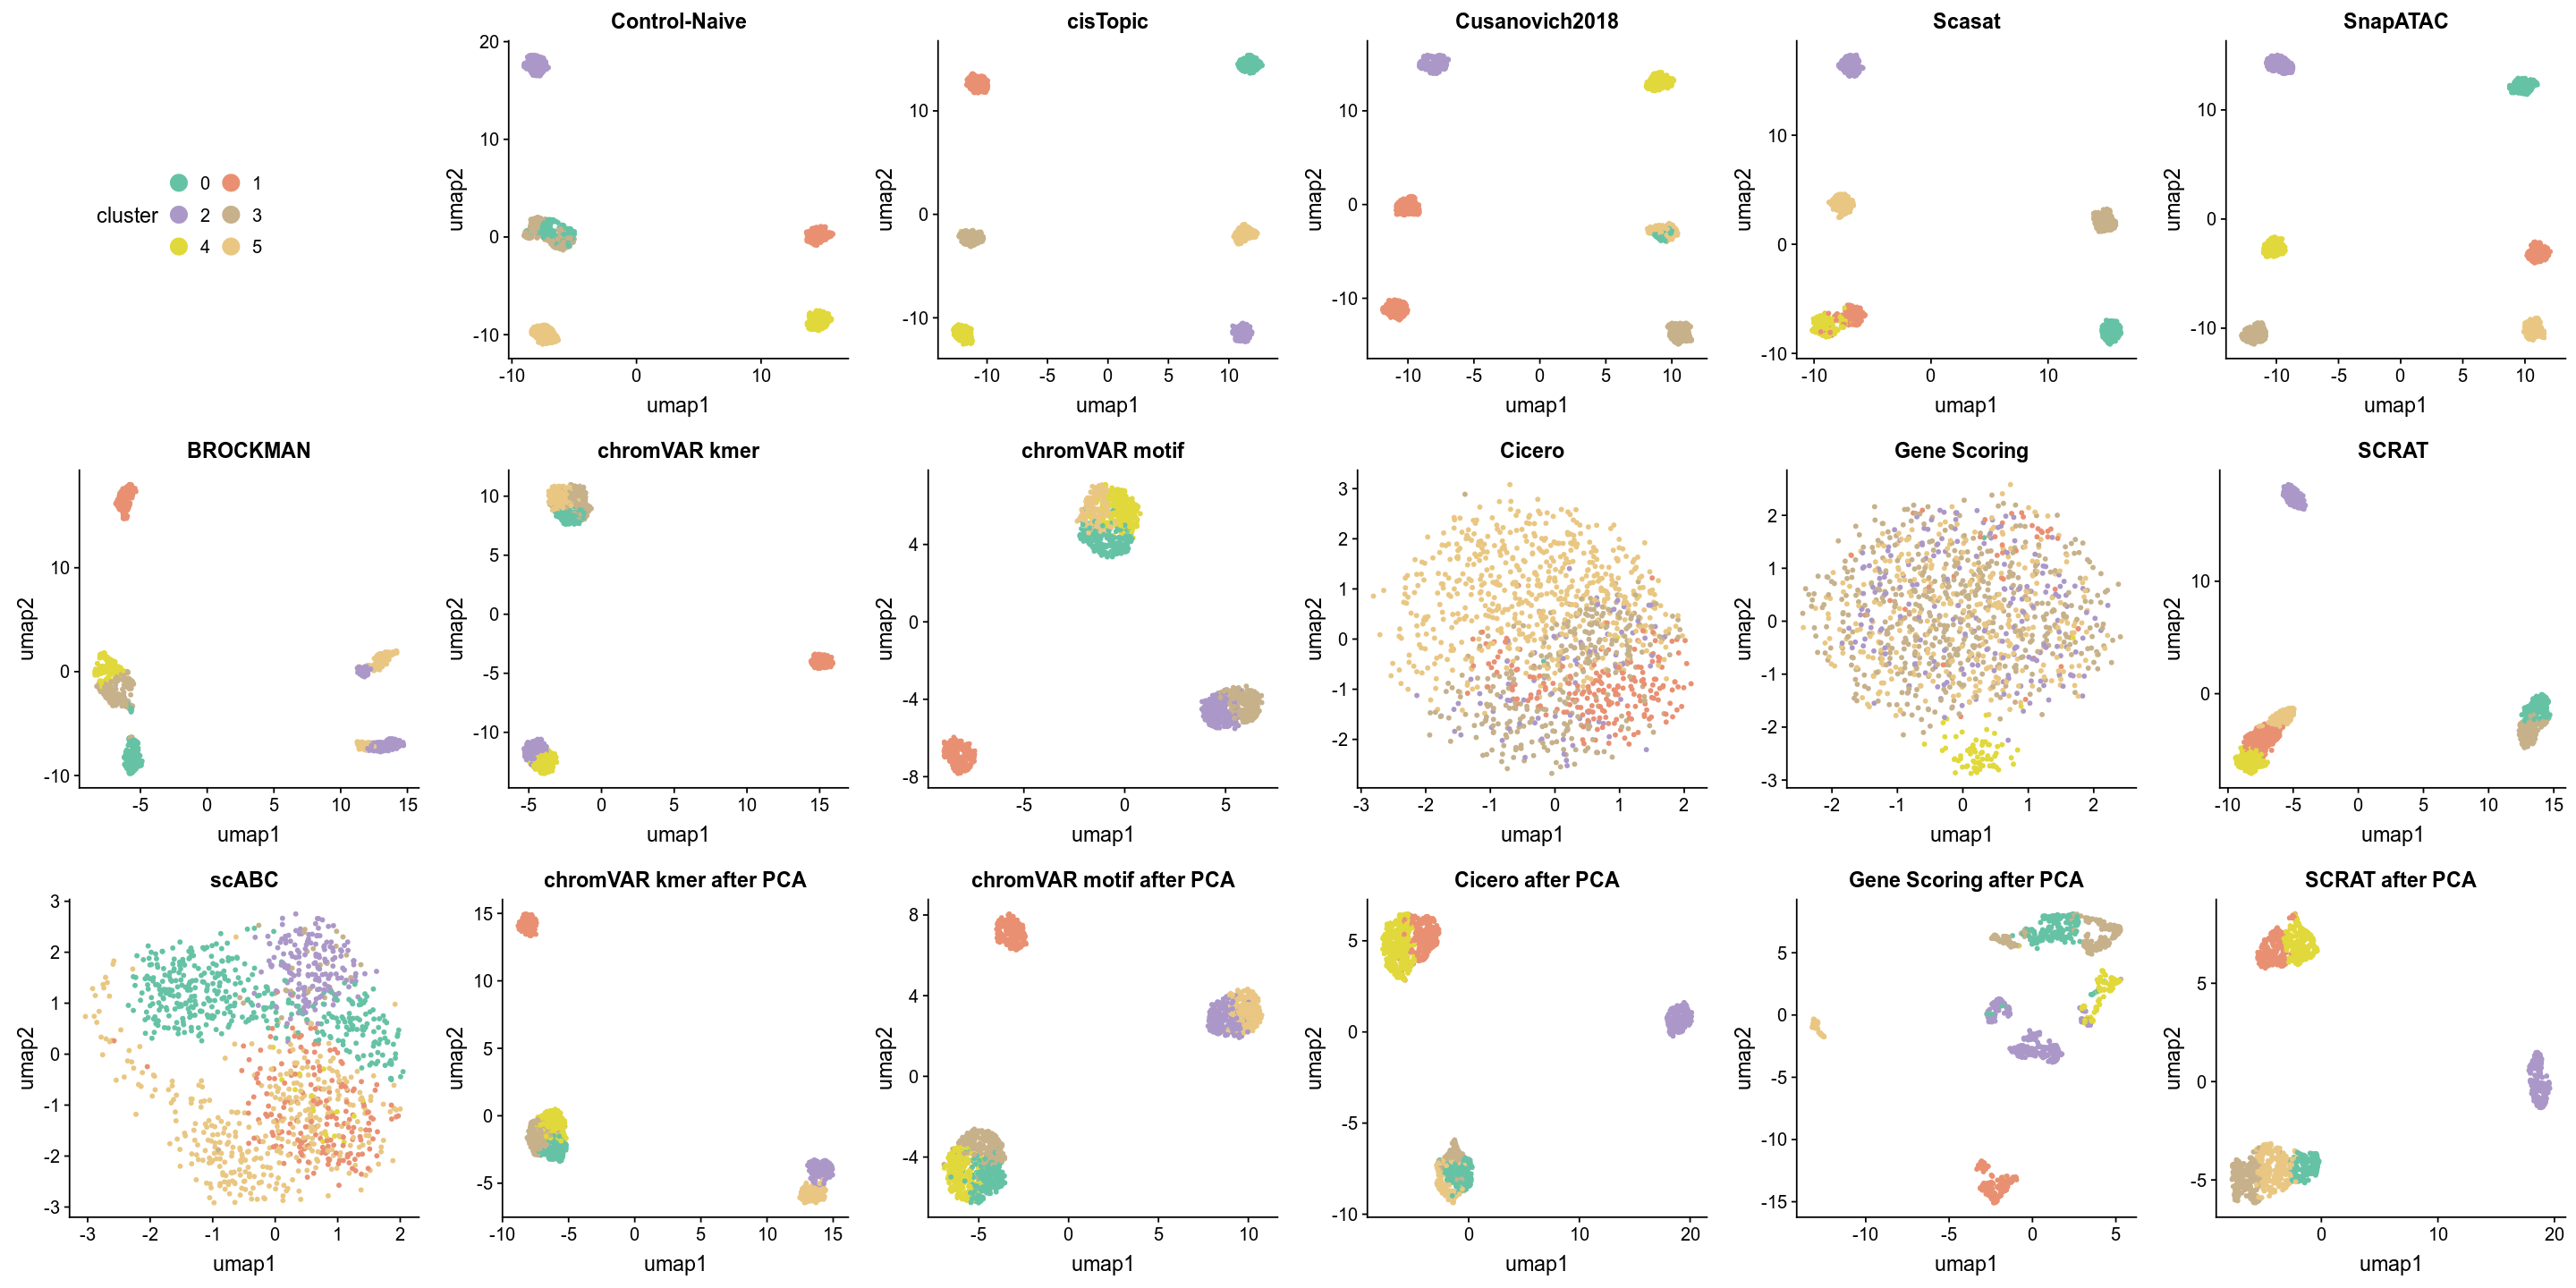

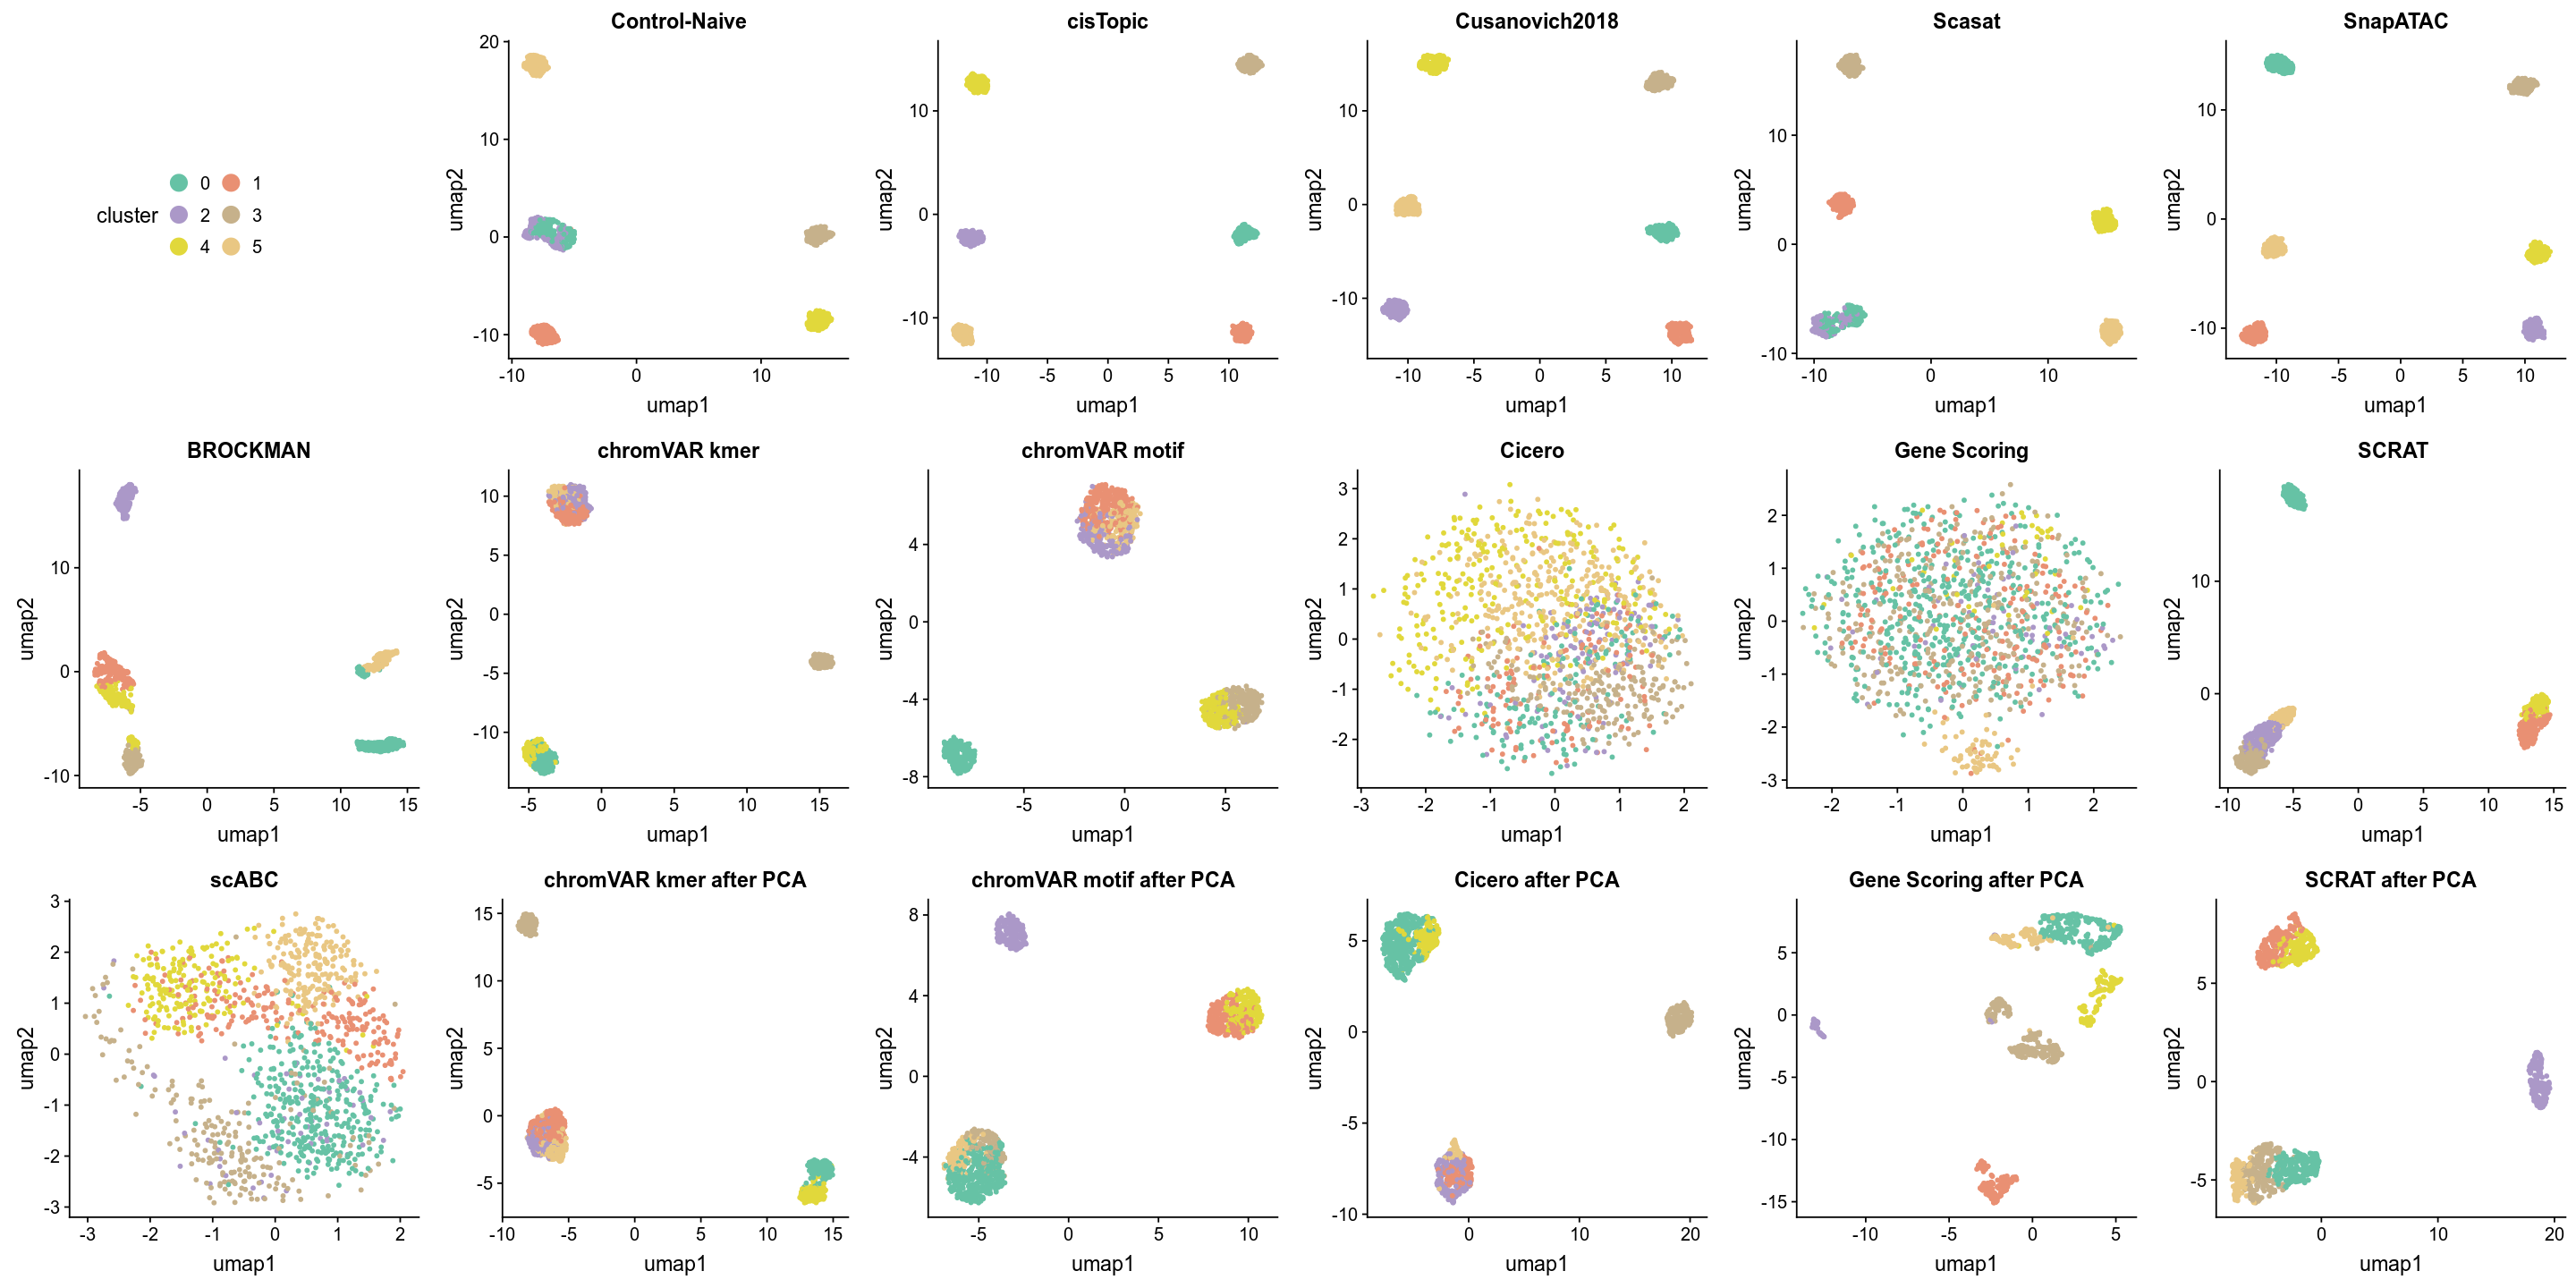

In [15]:
list_plots